# THE SPARKS FOUNDATION

## TECHNICAL TASK 1 - Prediction using Supervised ML
### DATA SCIENCE AND BUSINESS ANALYTICS

### MADE BY SHIV RAJ SINGH

## LINEAR REGRESSION

In this section we will see how to create a simple linear regression model of Machine Learning using Pyhton Scikit-Learn.
Scikit-Learn can be used for various complex Machine Learning Algorithms.This is just the basic implementation of Scikit-Learn function of Python.

### PROBLEM STATEMENT : Predict the percentage of marks that a student is expected to score based on number                                                                                            of Hours they studied.

In [48]:
#Importing the required Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
data=pd.read_excel("dataset.xlsx")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [50]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [52]:
data[data['Hours'].duplicated()]

,Hours,Scores
16,2.5,30
20,2.7,30


In [53]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [54]:
data.nunique()

Hours     23
Scores    23
dtype: int64

Since we have explored the data the next step is to clean the data.It will be done by checking for missing values is any

In [55]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can observe that there are no null values present in the data.

In [56]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


It can be seen that Score is highly correlated with the hours

Now the next step is Plotting the DATA

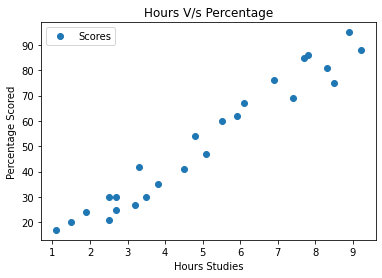

In [57]:
data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours V/s Percentage")
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scored')
plt.show()

From this plot we can observe that there is a positive linear relation between the number of ours studied and the percentage scored by a student

## Preparing Data

The data will be now divided into attributes(input) and labels(output)

In [58]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values


Once the data is divided the next step is splitting the data into train data and test data for the purpose of Training and Testing the Model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training

Since the problem belong to Linear Regression, the data will be trained using the Linear Regression algorithm by importing it from scikit learn.


In [60]:

model= LinearRegression()
model.fit(X_train,y_train)
print("Training is completed")

Training is completed


The problem is of Simple Linear Regression type as it has only two variables.
Simple Linear Regression is a Model which helps to predict the dependent variable value by observing the visualization crested by Scatter plot.
In this Visualization we fit the Linear Regression Line whose equation is 
### y'=b0+ b1x1
where b0= intercept
      b1= coeficient
Thus a simple linear regression model basically finds the best value for the intercept which results in a line that best fits the data.

In [61]:
#Setting values of intercept and calculating the slope
print(model.intercept_)
print(model.coef_)


2.018160041434683
[9.91065648]


In [62]:
#Plotting the line
line=model.coef_*X + model.intercept_

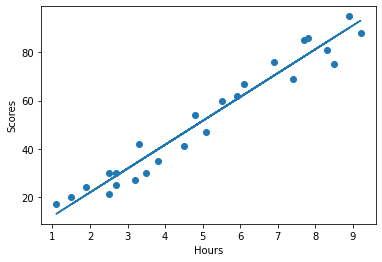

In [63]:
#Plotting the test Data
plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X,line)
plt.show()

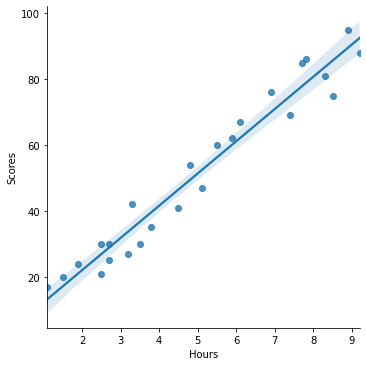

In [64]:
sns.lmplot(x='Hours',y='Scores',data=data)

## Prediction


In [65]:
print(X_test) #Testing data-Hours
y_pred=model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing the Actual and Predicted Values

In [66]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


We can also test with our own data as input to the model
What will be predicted score if a student studies for 9.25 hrs/ day?

In [67]:
hours = np.array([[9.25]])
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluation

We will check the accuracy of the model using MSE i.e Mean Squared Error. There are various others metrics available to check the accuracy too.

In [68]:
from sklearn import metrics
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test,y_pred))

Mean Squared Error:  4.183859899002975


Thus the model is approximately 85% accurate